# Social demographics based on borough code

#### Questions to look into based on incidents

- Will attendance time be higher for "poorer" neighborhoods
- Will attendance time be higher for more ethnicity variety
- Does the age result in higher cases of some kind ? 

### Important to note
- The data is ranging from 2011 to 2015 and since newer data was not found this will have to do for the analysis of the impact of social demographics on incident cases and their attendance time.

In [15]:
# Import necessary libraries and apply settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from IPython.display import Image
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]

In [25]:
# Load the previously cleaned dataset
incidents = pd.read_csv('fire_incidents2020.csv')#pd.read_csv('fire_incidents1year.csv')
incidents = incidents.append(pd.read_csv('fire_incidents2019.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2018.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2017.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2016.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2015.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2014.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2013.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2012.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2011.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2010.csv'));
incidents = incidents.append(pd.read_csv('fire_incidents2009.csv'));

# Extract length of dataframe and the number of rows that contain attendance time
len(incidents), incidents.AttendanceTimeSeconds.count()

/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (52,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/hlynurarnisigurjonsson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,25,52,83) have mixed types.Specify dtype option o

(1219414, 1123899)

In [296]:
incidents = incidents.dropna(axis=0, subset=['AttendanceTimeSeconds'])

In [298]:
incidents.Ward.count()

616933

In [418]:
# read in the data 
file = 'london-borough-profiles.csv'
df = pd.read_csv(file,encoding='iso-8859-1')

In [419]:
# "black, Asian and minority ethnic" (BAME)

select_columns = ['GLA_Population_Estimate_2017','Code', 'Area_name',
       'Average_Age,_2017','Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       '%_of_resident_population_born_abroad_(2015)',
       '%_of_population_from_BAME_groups_(2016)',
       'Gross_Annual_Pay,_(2016)',
       'Modelled_Household_median_income_estimates_2012/13',
       'Crime_rates_per_thousand_population_2014/15',
       'Fires_per_thousand_population_(2014)',
       'Ambulance_incidents_per_hundred_population_(2014)',
       'Median_House_Price,_2015',
       'Rented_from_Local_Authority_or_Housing_Association,_(2014)_%',
       'Rented_from_Private_landlord,_(2014)_%',
       'Childhood_Obesity_Prevalance_(%)_2015/16']

df_selected = df[select_columns].copy()

# dropa last 5 rows as their are not boroughs
df_selected = df_selected[0:-5]

# Set the index as burough name since all plots will be comparing the boroughs
df_selected = df_selected.set_index("Area_name")
df_selected.head()

,GLA_Population_Estimate_2017,Code,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",%_of_resident_population_born_abroad_(2015),%_of_population_from_BAME_groups_(2016),"Gross_Annual_Pay,_(2016)",Modelled_Household_median_income_estimates_2012/13,Crime_rates_per_thousand_population_2014/15,Fires_per_thousand_population_(2014),Ambulance_incidents_per_hundred_population_(2014),"Median_House_Price,_2015","Rented_from_Local_Authority_or_Housing_Association,_(2014)_%","Rented_from_Private_landlord,_(2014)_%",Childhood_Obesity_Prevalance_(%)_2015/16
Area_name,,,,,,,,,,,,,,,,,
City of London,8800,E09000001,43.2,11.4,73.1,15.5,.,27.5,.,"£63,620",.,12.3,.,799999,.,.,NaN
Barking and Dagenham,209000,E09000002,32.9,27.2,63.1,9.7,37.8,49.5,27886,"£29,420",83.4,3,13.7,243500,35.9,20.3,28.5
Barnet,389600,E09000003,37.3,21.1,64.9,14.0,35.2,38.7,33443,"£40,530",62.7,1.6,11.1,445000,11.1,31.1,20.7
Bexley,244300,E09000004,39.0,20.6,62.9,16.6,16.1,21.4,34350,"£36,990",51.8,2.3,11.8,275000,15.2,11.4,22.7
Brent,332100,E09000005,35.6,20.9,67.8,11.3,53.9,64.9,29812,"£32,140",78.8,1.8,12.1,407250,20.4,34.8,24.3


In [420]:
# dropa last 5 rows as their are not boroughs
df = df[0:-5]

# Set the index as burough name since all plots will be comparing the boroughs
df = df.set_index("Area_name")
# change name of column to shorter name 
df.rename(columns={'Modelled_Household_median_income_estimates_2012/13': "Houshold_Median_Income"},inplace=True)
df.rename(columns={'%_of_population_from_BAME_groups_(2016)': "BAME_P"},inplace=True)

# convert to great britain local setting, remove pound symbol and convert to float
df['Houshold_Median_Income'] = df['Houshold_Median_Income'].apply(get_float)
df['Median_House_Price,_2015'] = df['Median_House_Price,_2015'].apply(get_float_simple)
df['BAME_P'] = df['BAME_P'].apply(get_float_simple)
df.head()

,Code,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Area_name,,,,,,,,,,,,,,,,,,,,,
City of London,E09000001,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
Barking and Dagenham,E09000002,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,9.7,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
Barnet,E09000003,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,14.0,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
Bexley,E09000004,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,16.6,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
Brent,E09000005,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,11.3,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [421]:
# Create function to fix values presented in pounds, and create conveniant statistics with pivoting
import locale
def get_float(num):
    locale.setlocale(locale.LC_ALL, "en_GB")
    return float(locale.atof(num[1:]))

def get_float_simple(num):
    locale.setlocale(locale.LC_ALL, "en_GB")
    return float(locale.atof(num))

def pivot_group(column):
    df_group = instances.groupby(column).AttendanceTimeSeconds.agg(['min', 'mean', 'max', 'count'])
    display(df_group.style.background_gradient(cmap='Reds'))
    print('Range between mean values: ', round(df_group['mean'].max() - df_group['mean'].min(), 1), ' seconds')

### Fix the data and rename columns for conveniance

In [422]:
# change name of column to shorter name 
df_selected.rename(columns={'Modelled_Household_median_income_estimates_2012/13': "Houshold_Median_Income"},inplace=True)
df_selected.rename(columns={'%_of_population_from_BAME_groups_(2016)': "BAME_P"},inplace=True)

# convert to great britain local setting, remove pound symbol and convert to float
df_selected['Houshold_Median_Income'] = df_selected['Houshold_Median_Income'].apply(get_float)
df_selected['Median_House_Price,_2015'] = df_selected['Median_House_Price,_2015'].apply(get_float_simple)
df_selected['BAME_P'] = df_selected['BAME_P'].apply(get_float_simple)
df_selected.head()

,GLA_Population_Estimate_2017,Code,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",%_of_resident_population_born_abroad_(2015),BAME_P,"Gross_Annual_Pay,_(2016)",Houshold_Median_Income,Crime_rates_per_thousand_population_2014/15,Fires_per_thousand_population_(2014),Ambulance_incidents_per_hundred_population_(2014),"Median_House_Price,_2015","Rented_from_Local_Authority_or_Housing_Association,_(2014)_%","Rented_from_Private_landlord,_(2014)_%",Childhood_Obesity_Prevalance_(%)_2015/16
Area_name,,,,,,,,,,,,,,,,,
City of London,8800,E09000001,43.2,11.4,73.1,15.5,.,27.5,.,63620.0,.,12.3,.,799999.0,.,.,NaN
Barking and Dagenham,209000,E09000002,32.9,27.2,63.1,9.7,37.8,49.5,27886,29420.0,83.4,3,13.7,243500.0,35.9,20.3,28.5
Barnet,389600,E09000003,37.3,21.1,64.9,14.0,35.2,38.7,33443,40530.0,62.7,1.6,11.1,445000.0,11.1,31.1,20.7
Bexley,244300,E09000004,39.0,20.6,62.9,16.6,16.1,21.4,34350,36990.0,51.8,2.3,11.8,275000.0,15.2,11.4,22.7
Brent,332100,E09000005,35.6,20.9,67.8,11.3,53.9,64.9,29812,32140.0,78.8,1.8,12.1,407250.0,20.4,34.8,24.3


Before we look at the distribution of ethnicity groups and see how many many are born outside the UK, we have to check if there are any values that cant be used. Those columns that are missing values we will try to skip those as best as we can, and just use other ones that represent similar things.

In [423]:
# lets see those values
print(df_selected.isin(['.']).sum(axis=0))
# remove the dots and replace with nan
df_selected = df_selected.replace('.', np.nan)

# drop columns having nan values
df_selected = df_selected.dropna(axis=1);

GLA_Population_Estimate_2017                                    0
Code                                                            0
Average_Age,_2017                                               0
Proportion_of_population_aged_0-15,_2015                        0
Proportion_of_population_of_working-age,_2015                   0
Proportion_of_population_aged_65_and_over,_2015                 0
%_of_resident_population_born_abroad_(2015)                     1
BAME_P                                                          0
Gross_Annual_Pay,_(2016)                                        2
Houshold_Median_Income                                          0
Crime_rates_per_thousand_population_2014/15                     1
Fires_per_thousand_population_(2014)                            0
Ambulance_incidents_per_hundred_population_(2014)               1
Median_House_Price,_2015                                        0
Rented_from_Local_Authority_or_Housing_Association,_(2014)_%    1
Rented_fro

## Look at various distribution and see what can be used to check for any bias on groups or locations

Firstly lets look at the population distribution.

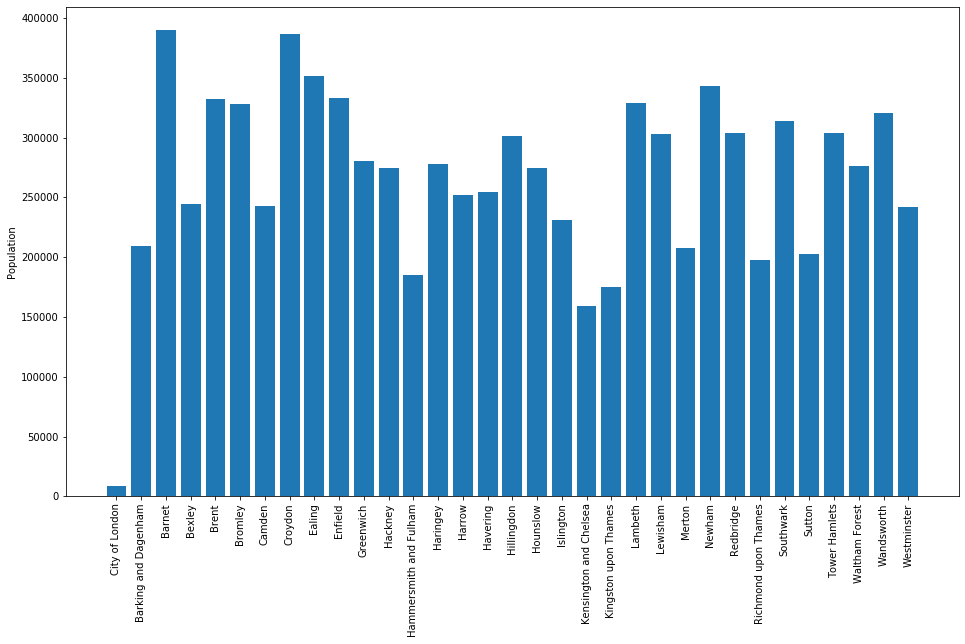

In [424]:
plt.bar(df.index,df_selected['GLA_Population_Estimate_2017'])
plt.ylabel("Population");
plt.xticks(rotation=90);

It is quite obvious how "city of lond" has the lowest population.

### Age distribution

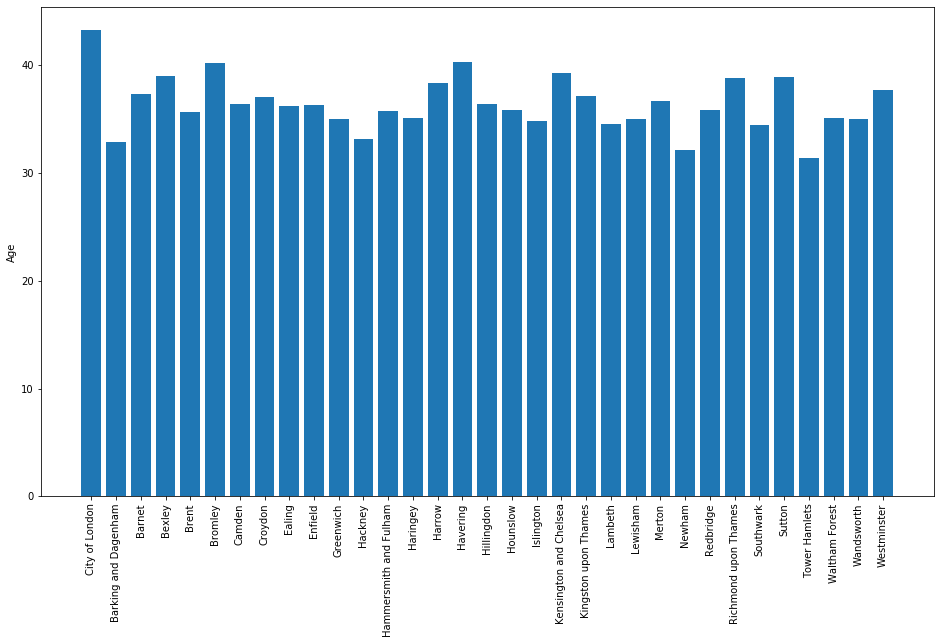

In [425]:
plt.bar(df_selected.index,df_selected['Average_Age,_2017'])
plt.ylabel("Age");
plt.xticks(rotation=90);

By looking at the average age between the neighborhoods it seems to be evenly distributed. But to further see if there are certain age groups that are smaller the 3 categories are plotted as a stacked bar plot below.

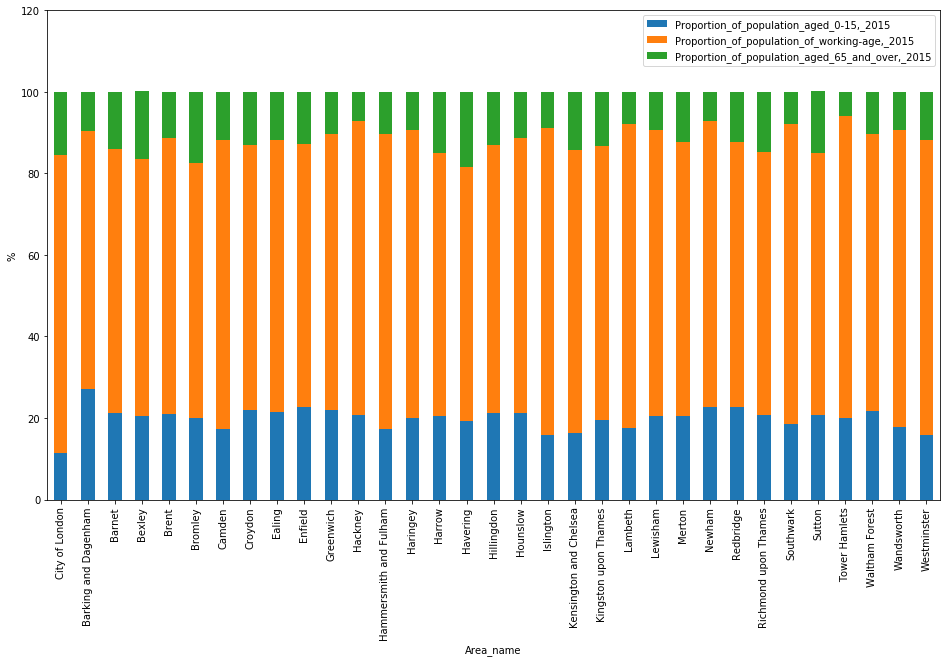

In [426]:
df_age = df_selected[['Proportion_of_population_aged_0-15,_2015',
                      'Proportion_of_population_of_working-age,_2015',
                     'Proportion_of_population_aged_65_and_over,_2015']]
# plt.figure(figsize=(16,9));

fig = df_age.plot(kind='bar',stacked=True);
plt.ylabel("%");
fig.set_ylim([0,120]);

This shows that the distribution is somewhat evenly distributed, even though some areas have a bit uneven younger and older class, but the working class is the biggest portion as expected. So this investigation for calls based on the age,especially on the type of special cases, is not going to be considered since there is no abvious age disperancy between boroughs.

## Poor vs rich neighborhoods

For the question of poor neighborhoods and rich neighborhood, and if there is difference on the average response time, lets then first look at how the borough compare in regards to the houshold median income (2012/2013).

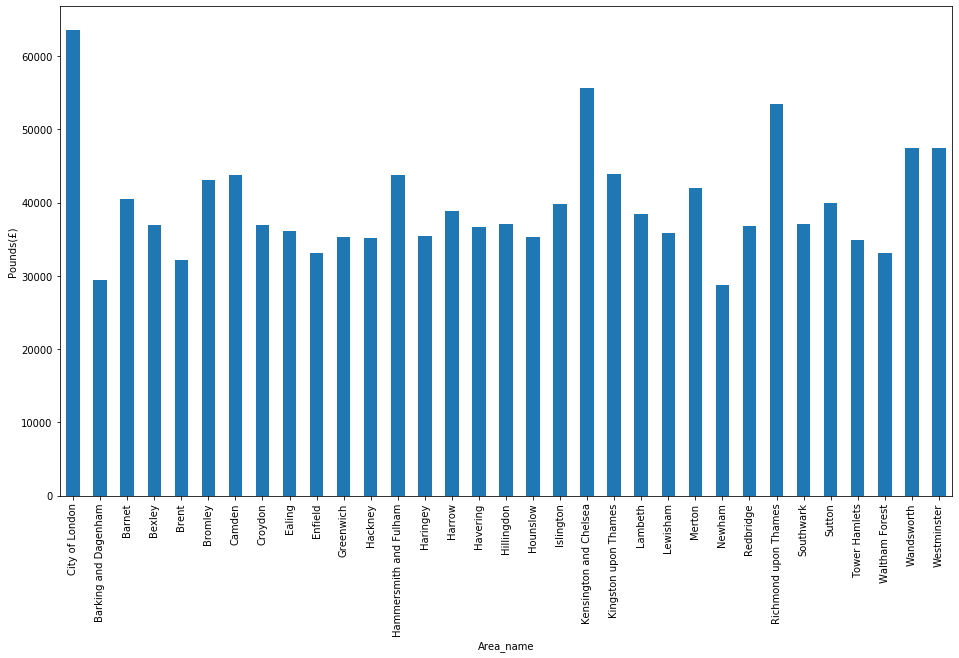

In [427]:
df_selected['Houshold_Median_Income'].plot(kind='bar')
plt.ylabel("Pounds(£)");
plt.xticks(rotation=90);

It can be seen how, unsurprisingly, "City of London" has the highest median inccome out of the boroughs, this is mostly do to the average age being higher and also that property are higher in price in that area. Now to put this into perspective of the average attendance, lets then compare and plot together.

If the income is compared with the housing prices it can be seen how the average housing price is not neccesseraly connected to the average income of the boroughs. But it will be considered that the boroughs that have higher income are of righer lable than the other ones.

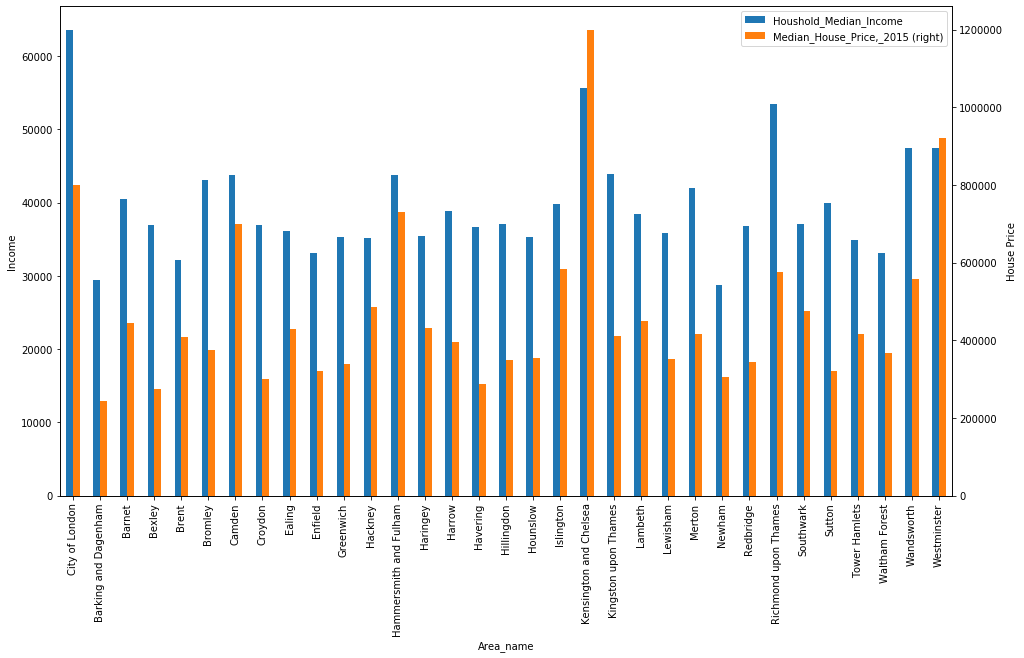

In [428]:
df_selected[['Houshold_Median_Income','Median_House_Price,_2015']].plot.bar(figsize=(16,9), secondary_y= 'Median_House_Price,_2015')

ax1, ax2 = plt.gcf().get_axes(); # gets the current figure and then the axes
ax1.set_ylabel('Income');
ax2.set_ylabel('House Price');

## Ethnicity

Lets look at the BAME group and see how it differentiate

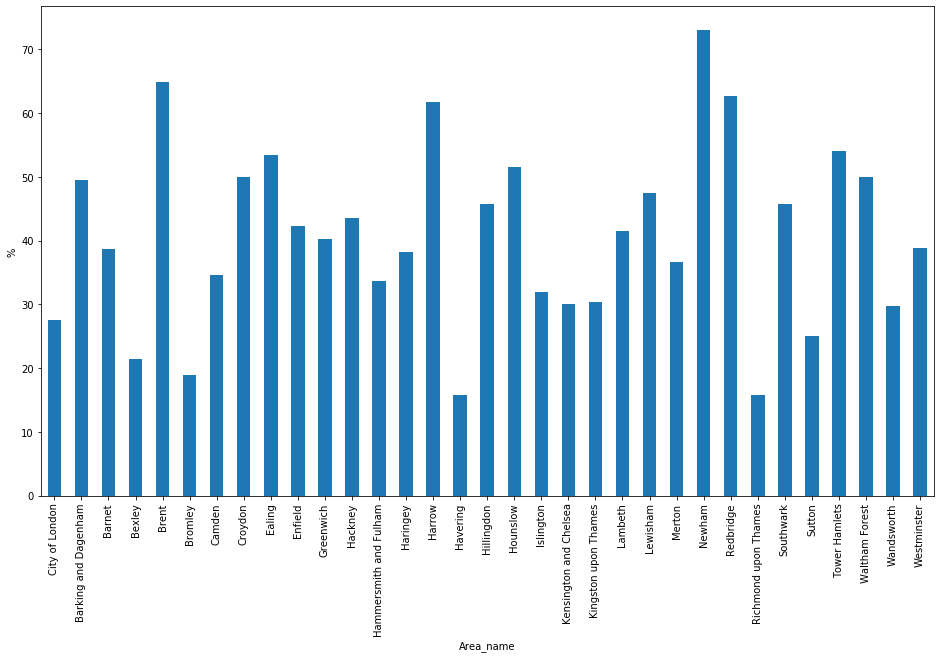

In [429]:
df_selected['BAME_P'].plot(kind='bar')
plt.ylabel("%");
plt.xticks(rotation=90);

In [430]:
# Function to easily compare the attendance time based other column values
def pivot_group(column):
    df_group = incidents.groupby(column).AttendanceTimeSeconds.agg(['min', 'mean', 'max', 'count'])
    display(df_group.style.background_gradient(cmap='Reds'))
    return(df_group)
    print('Range between mean values: ', round(df_group['mean'].max() - df_group['mean'].min(), 1), ' seconds')

## Examine the attendance times based on boroughs

In [431]:
# check if this burough code is in the social_demo dataset
df_selected[df_selected.Code == 'E00000000']

,GLA_Population_Estimate_2017,Code,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",BAME_P,Houshold_Median_Income,Fires_per_thousand_population_(2014),"Median_House_Price,_2015"
Area_name,,,,,,,,,,


In [432]:
# Clean the dataset in same way as in the weather part 
incidents['PumpArriving'] = incidents[['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime']].min(axis=1)
incidents['CleanAttendanceTimeSeconds'] = incidents[['PumpArriving', 'AttendanceTimeSeconds']].min(axis=1)

# Filter out the boroughcode of E00000000, since it is not in the data of social demographics
incidents = incidents[incidents.IncGeo_BoroughCode != 'E00000000']

In [433]:
df_times = pivot_group(incidents.IncGeo_BoroughCode)

,min,mean,max,count
IncGeo_BoroughCode,,,,
E09000001,2.000000,294.279269,1176.000000,13453
E09000002,1.000000,349.569415,4079.000000,23266
E09000003,1.000000,365.414708,1200.000000,37055
E09000004,0.000000,351.962968,3879.000000,22791
E09000005,2.000000,351.658720,1200.000000,33055
E09000006,1.000000,371.612954,1197.000000,32221
E09000007,1.000000,291.889296,1199.000000,56493
E09000008,0.000000,330.112516,1199.000000,41203
E09000009,1.000000,333.394988,1200.000000,37553


## Compare the times to the income and ethnicity

In [434]:
df_times = df_times.reset_index()

In [435]:
df_times[df_times.IncGeo_BoroughCode == 'E09000033']['mean'].values[0]

312.15218342418615

In [436]:
df_selected['Mean_Attendance_Time'] = [df_times[df_times.IncGeo_BoroughCode == x]['mean'].values[0] for x in df_selected.Code]
df_selected['Count'] = [df_times[df_times.IncGeo_BoroughCode == x]['count'].values[0] for x in df_selected.Code]
df_selected.head()

,GLA_Population_Estimate_2017,Code,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",BAME_P,Houshold_Median_Income,Fires_per_thousand_population_(2014),"Median_House_Price,_2015",Mean_Attendance_Time,Count
Area_name,,,,,,,,,,,,
City of London,8800,E09000001,43.2,11.4,73.1,15.5,27.5,63620.0,12.3,799999.0,294.279269,13453
Barking and Dagenham,209000,E09000002,32.9,27.2,63.1,9.7,49.5,29420.0,3,243500.0,349.569415,23266
Barnet,389600,E09000003,37.3,21.1,64.9,14.0,38.7,40530.0,1.6,445000.0,365.414708,37055
Bexley,244300,E09000004,39.0,20.6,62.9,16.6,21.4,36990.0,2.3,275000.0,351.962968,22791
Brent,332100,E09000005,35.6,20.9,67.8,11.3,64.9,32140.0,1.8,407250.0,351.658720,33055


No we look at the connection between the median income and attendance time:

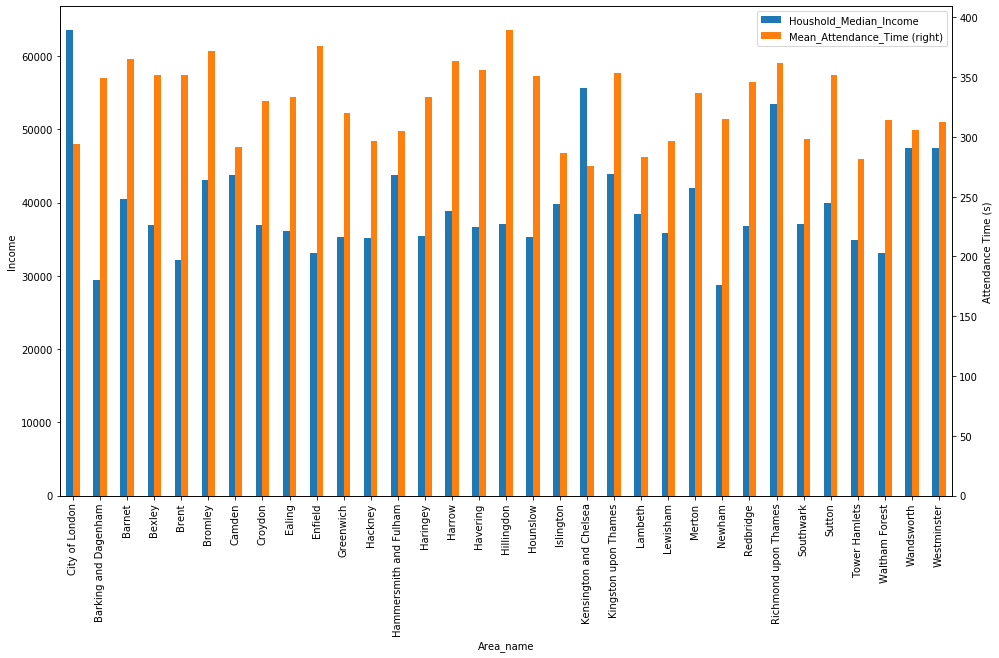

In [437]:
df_selected[['Houshold_Median_Income','Mean_Attendance_Time']].plot.bar(figsize=(16,9), secondary_y= 'Mean_Attendance_Time')

ax1, ax2 = plt.gcf().get_axes(); # gets the current figure and then the axes
ax1.set_ylabel('Income');
ax2.set_ylabel('Attendance Time (s)');

Based on the bar plot there is no obvious indication that 'richer' boroughs have lower or higher attendance time. To further investigate the BAME group is plotted along with the attendance time. 

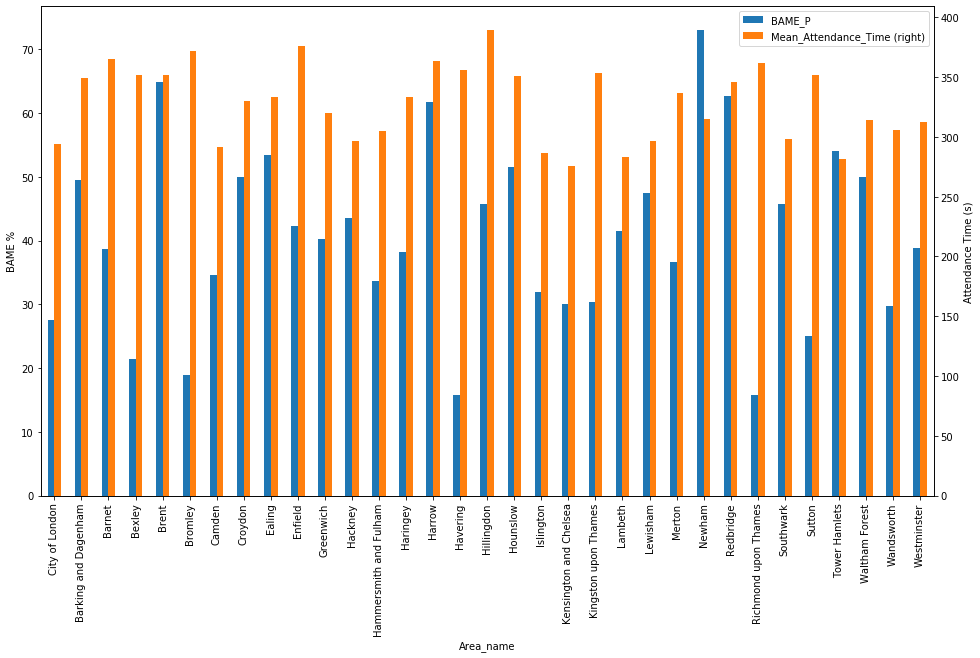

In [438]:
df_selected[['BAME_P','Mean_Attendance_Time']].plot.bar(figsize=(16,9), secondary_y= 'Mean_Attendance_Time')

ax1, ax2 = plt.gcf().get_axes(); # gets the current figure and then the axes
ax1.set_ylabel('BAME %');
ax2.set_ylabel('Attendance Time (s)');

As before there is no clear indication that they are correlated in any way. But it would be interesting to see if poorer neighborhoods have more calls.

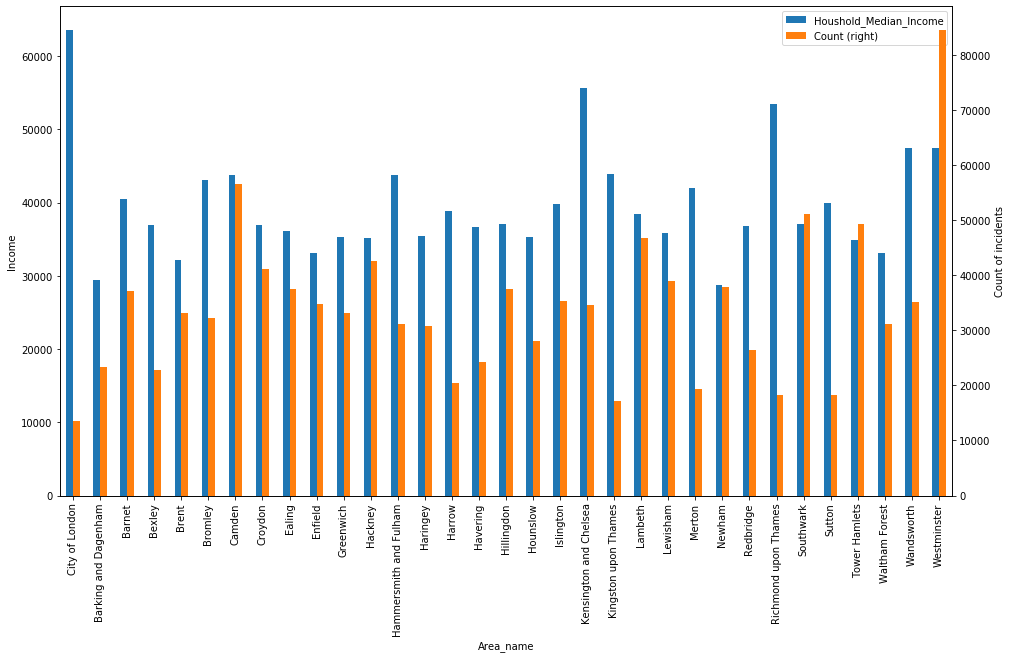

In [443]:
df_selected[['Houshold_Median_Income','Count']].plot.bar(figsize=(16,9), secondary_y= 'Count')

ax1, ax2 = plt.gcf().get_axes(); # gets the current figure and then the axes
ax1.set_ylabel('Income');
ax2.set_ylabel('Count of incidents');

To see investigate the correlation a correlation matrix is created of the chosen columns:

In [441]:
corr = df_selected[df_selected.columns[1:]].corr()['Mean_Attendance_Time'][:-1]
# corr.style.background_gradient(cmap='coolwarm')
print("Correlation on attendance time:")
corr

Correlation on attendance time:


Average_Age,_2017                                  0.312855
Proportion_of_population_aged_0-15,_2015           0.542838
Proportion_of_population_of_working-age,_2015     -0.850033
Proportion_of_population_aged_65_and_over,_2015    0.592084
BAME_P                                            -0.048073
Houshold_Median_Income                            -0.239924
Median_House_Price,_2015                          -0.544322
Mean_Attendance_Time                               1.000000
Name: Mean_Attendance_Time, dtype: float64

It can be seen how the BAME_P has little to no correlation with the attendance time, and thus it can be said that it does not affect the attendance time. On the same not the incident counts do not affect the attendance time either. Richer neigbhorhoods are not served better than the ones that are poorer. So it is save to save that the LFB is doing a fantastic job in not being biased against groups or neighborhoods.

And if we look at the whole social demo dataframe the correlation to attendance time is as follows:

In [368]:
df['Mean_Attendance_Time'] = [df_times[df_times.IncGeo_BoroughCode == x]['mean'].values[0] for x in df.Code]
corr = df[df.columns[1:]].corr()['Mean_Attendance_Time'][:-1]
# corr.style.background_gradient(cmap='coolwarm')
print("Correlation on attendance time:")
corr

Correlation on attendance time:


GLA_Population_Estimate_2017                          0.205366
Average_Age,_2017                                     0.312855
Proportion_of_population_aged_0-15,_2015              0.542838
Proportion_of_population_of_working-age,_2015        -0.850033
Proportion_of_population_aged_65_and_over,_2015       0.592084
BAME_P                                               -0.048073
New_migrant_(NINo)_rates,_(2015/16)                  -0.401693
Employment_rate_(%)_(2015)                            0.187198
Houshold_Median_Income                               -0.239924
%_of_employment_that_is_in_public_sector_(2014)      -0.060831
Jobs_Density,_2015                                   -0.211964
Number_of_active_businesses,_2015                    -0.292533
Two-year_business_survival_rates_(started_in_2013)    0.548328
Median_House_Price,_2015                             -0.544322
Number_of_cars,_(2011_Census)                         0.750720
Number_of_cars_per_household,_(2011_Census)           0

# Visulisation